# Singular Value Decomposition of the MNIST Dataset
### Import Packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

### Import dataset

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

n_train, _, _ = x_train.shape
n_test, _, _ = x_test.shape

# Transform into row vectors
x_train_reshaped = x_train.reshape(n_train, -1)
x_test_reshaped = x_test.reshape(n_test, -1)
data_row_vectors = np.concatenate((x_train_reshaped, x_test_reshaped), axis=0)
data_row_vectors.shape

(70000, 784)

### SVD on Row Vectors

In [8]:
U, E, Vt = np.linalg.svd(data_row_vectors, full_matrices=False)

print(U.shape)
print(E.shape)
print(Vt.shape)

(70000, 784)
(784,)
(784, 784)


### Plotting Singular Values

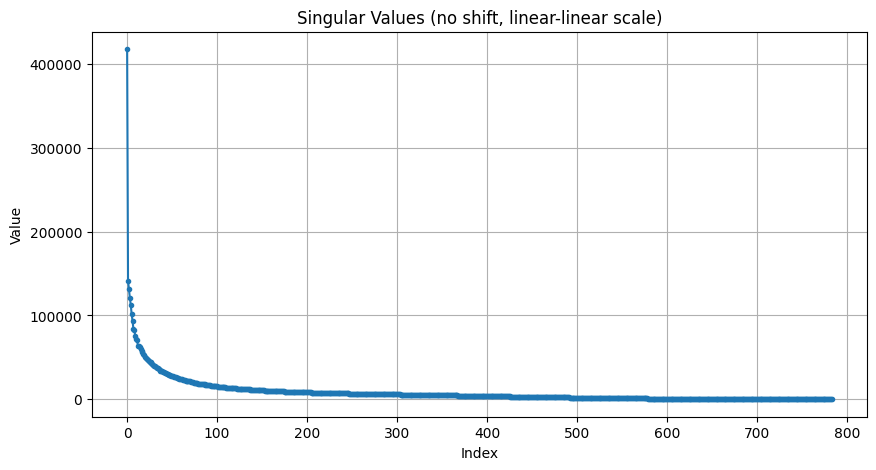

In [9]:
# Plotting the value vs index of the singular values
plt.figure(figsize=(10, 5))
plt.plot(range(len(E)), E, marker='.', linestyle='-')
plt.title("Singular Values (no shift, linear-linear scale)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

#### The graph (linear scale) shows a very sharp initial decrease but flattens out after a few hundred values

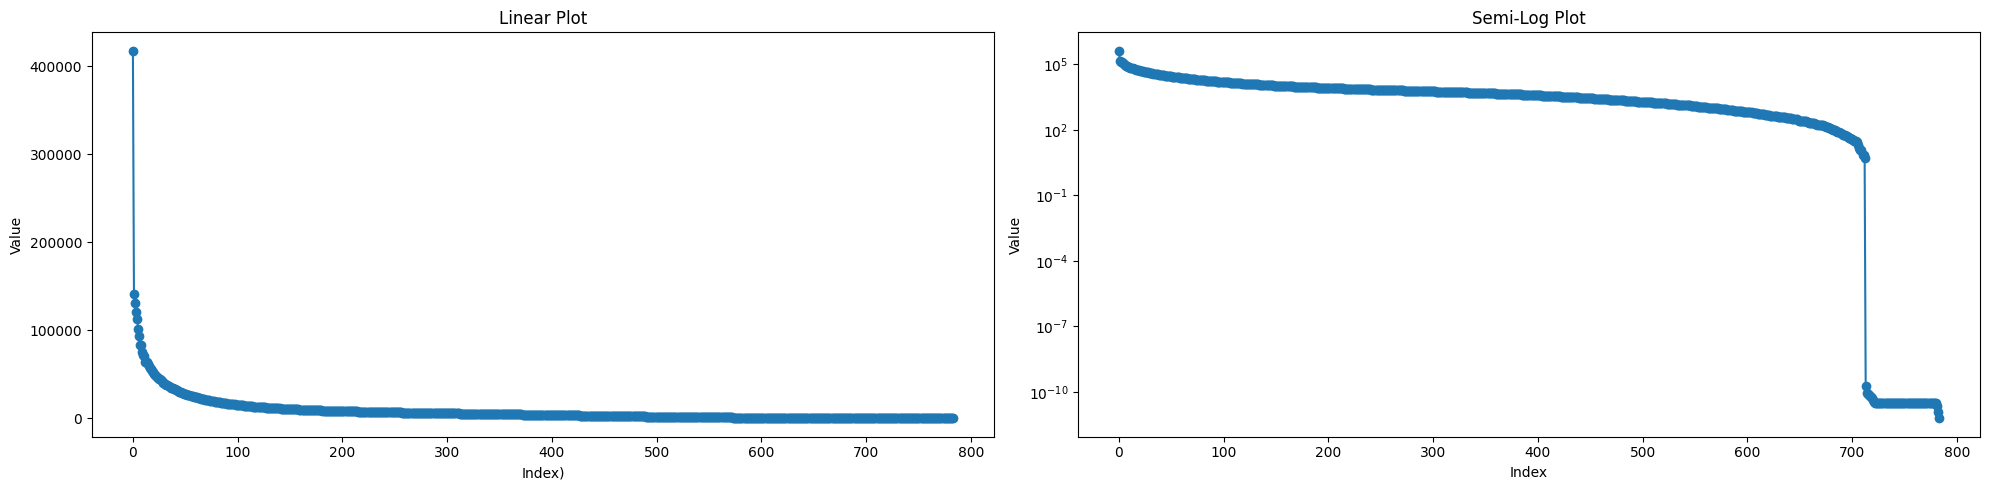

In [10]:
# Plot linear and semi-log
fig, (graph_1, graph_2) = plt.subplots(1, 2, figsize=(20, 5))

# linear
graph_1.plot(range(len(E)), E, marker='o', linestyle='-')
graph_1.set_title("Linear Plot")
graph_1.set_xlabel("Index)")
graph_1.set_ylabel("Value")

# semi-log
graph_2.semilogy(range(len(E)), E, marker='o', linestyle='-')
graph_2.set_title("Semi-Log Plot")
graph_2.set_xlabel("Index")
graph_2.set_ylabel("Value")
plt.tight_layout()
plt.show()


#### The semi-log graph shows a very steep drop off around the 700th index